## Holiday Events
### Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
### Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

| 特徵名稱        | 描述                                                                                                                                 |
|---------------|------------------------------------------------------------------------------------------------------------------------------------|
| date          | 此列代表記錄數據點的日期。它呈現為“DD-MM-YYYY”格式，指示收集銷售數據的日期。                                                                |
| Weekly_Sales  | 此列包含每週銷售額。它代表在特定一周內從銷售中產生的金額（以指定貨幣計）。每週銷售是企業追踪收入和表現的重要指標。                                           |
| Holiday_Flag  | 此二進制列指示特定一周是否包含假期。值1通常表明這是一個假期周，而值0則表示這是一個普通周。假期因消費者在節假日季節增加支出而對零售銷售有顯著影響。                      |
| Temperature   | 此列代表該周的平均溫度。溫度可以影響消費者行為和產品需求，特別是對於季節性商品，如服裝或暖通空調設備。                                                     |
| Fuel_Price    | 此列代表該週的燃料價格。燃油價格可以影響消費者的消費模式，因為更高的燃油價格可能導致減少在非必需品上的自由支出和更加謹慎的購物行為。                              |
| CPI           | 消費者價格指數（CPI）是一個經濟指標，衡量一籃子商品和服務的平均價格水平隨時間的變化。在此上下文中，它可能代表該周特定地區的CPI。CPI的變化可以影響消費者的購買力和通脹率。 |
| Unemployment  | 此列代表該周的失業率。失業率是衡量失業且積極尋求就業的勞動力百分比的關鍵經濟指標。高失業率可能導致消費者支出減少。                                           |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('walmart-sales-dataset-of-45stores.csv', sep=',', encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [7]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [8]:
pd.DataFrame(df[df['Holiday_Flag'] == 1].value_counts())

count
Store Date       Weekly_Sales Holiday_Flag Temperature Fuel_Price CPI        Unemployment       
1     2010-02-12 1641957.44   1            38.51       2.548      211.242170 8.106             1
34    2011-12-30 965512.36    1            28.84       3.119      130.071032 10.148            1
31    2011-12-30 1355405.95   1            45.16       3.129      219.177306 7.441             1
      2011-11-25 1934099.65   1            56.43       3.236      218.113027 7.441             1
      2011-09-09 1376670.27   1            78.87       3.546      215.514829 7.852             1
...                                                                                          ...
15    2011-11-25 1066478.10   1            41.10       3.689      136.478800 7.866             1
      2011-09-09 607593.51    1            67.59       3.930      136.274581 7.806             1
      2011-02-11 582864.35    1            21.64       3.416      133.260871 7.771             1
      2010-12-31 543754.17    1            26.54       3.336      132.815032 8.067             1
45    2012-09-07 766512.66    1            75.70       3.911      191.577676 8.684             1

[450 rows x 1 columns]

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [10]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


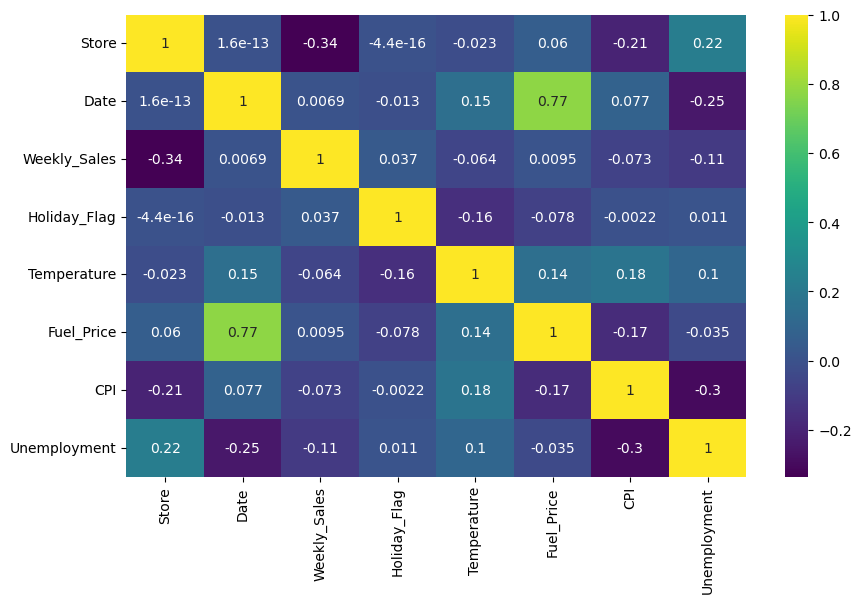

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

## Ratio between Weeklysales  Temperature with Store

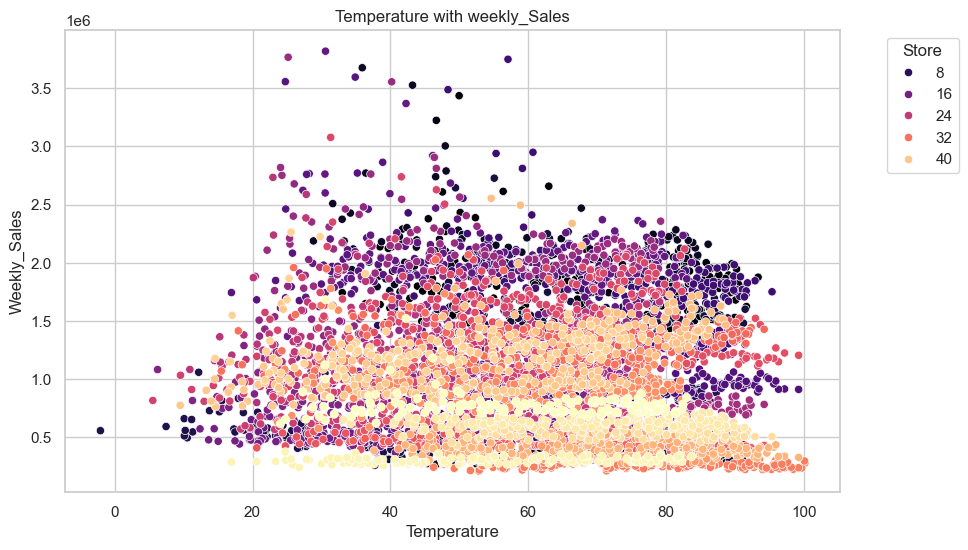

In [12]:
plt.figure(figsize=(10,6))

sns.set(style='whitegrid')

sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store', palette='magma')

plt.legend(title='Store', bbox_to_anchor=(1.05,1), loc='upper left')

plt.title('Temperature with weekly_Sales')
plt.show()

Temperature between 20~60 get the best Weekly Sales

## Ratio between Weeklysales and fuel price with Store

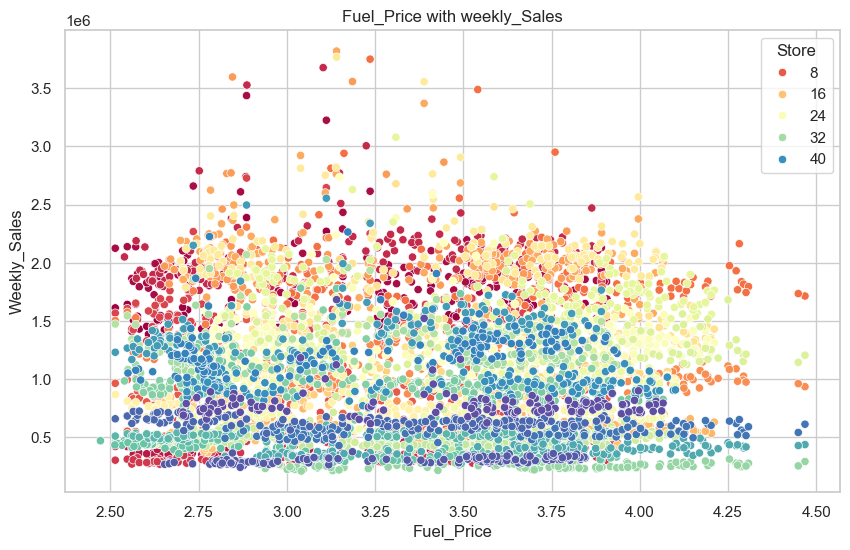

In [13]:
plt.figure(figsize=(10,6))

sns.set(style='whitegrid')

sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', hue='Store', palette='Spectral')

plt.title('Fuel_Price with weekly_Sales')
plt.show()

Weekly_sales are increase when fuel_price from 2.75 to 3.75 and stores 1 to 16 and weekly_sales are high

## Relation between Store and Unemployment

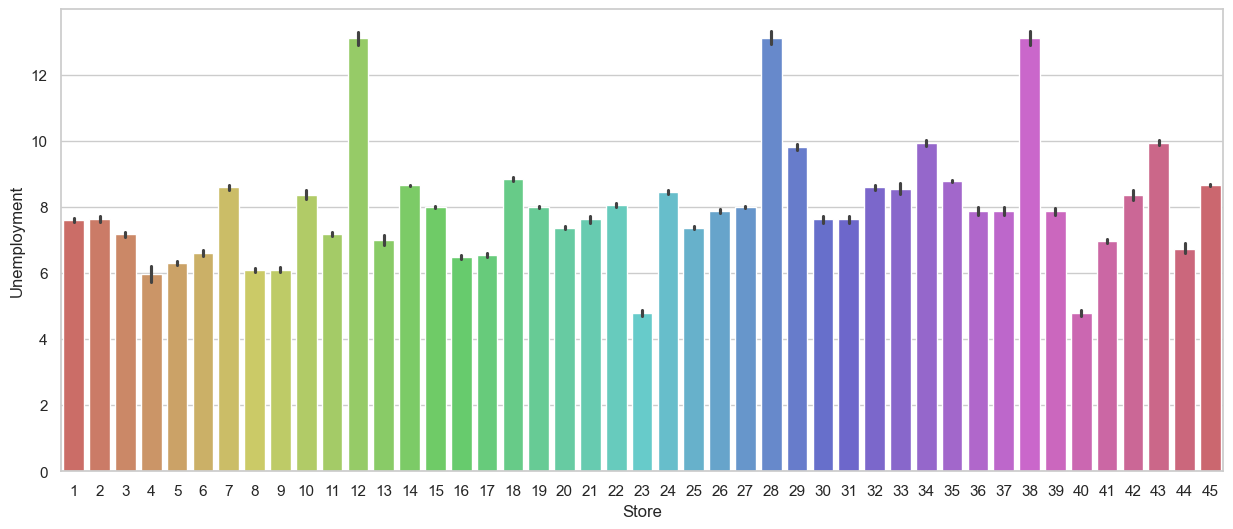

In [14]:
plt.figure(figsize=(15,6))

sns.barplot(df, x='Store', y='Unemployment', palette='hls')

plt.show()

The store 12,28,38 have higher number of unemployment and the store 23,40 have the lower number of unemployment

## Ratio between weekly_sales and store with holiday_flag

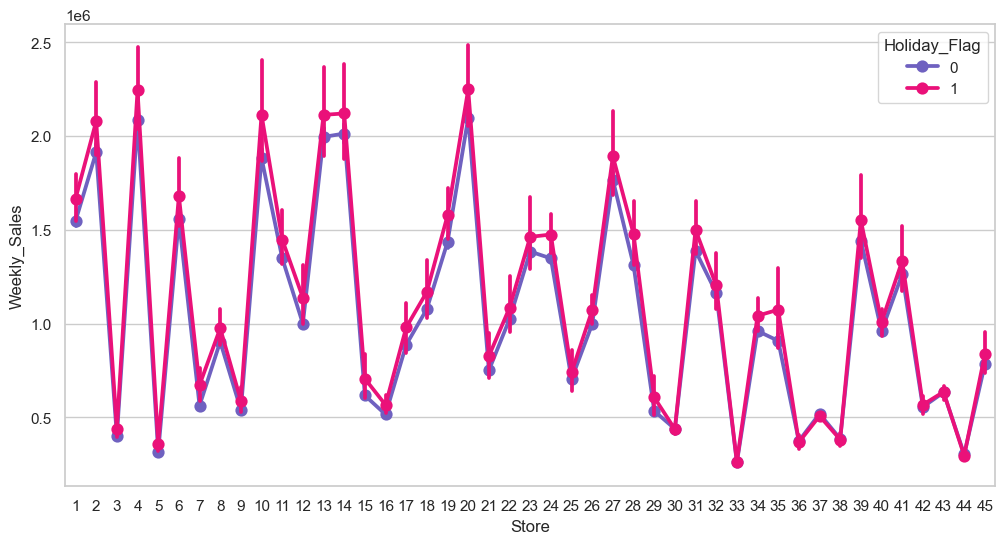

In [15]:
plt.figure(figsize=(12,6))

sns.pointplot(df, x='Store', y='Weekly_Sales', hue='Holiday_Flag', palette=["#6F61C0","#EA1179"])

plt.show()

The store 4,20 has the higher Weekly_Sales at holiday and no holiday, the store 5,33,44 have lower Weekly_Sales at holiday and no holiday

## Ratio between store and cpi with holiday_flag

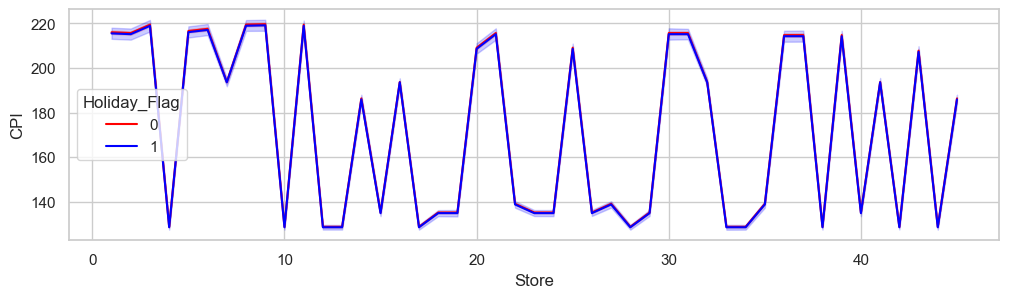

In [16]:
plt.figure(figsize=(12,3))

sns.lineplot(df, x='Store', y='CPI', hue='Holiday_Flag', palette=['Red', 'Blue'])

plt.show()

## Time Series Analysis

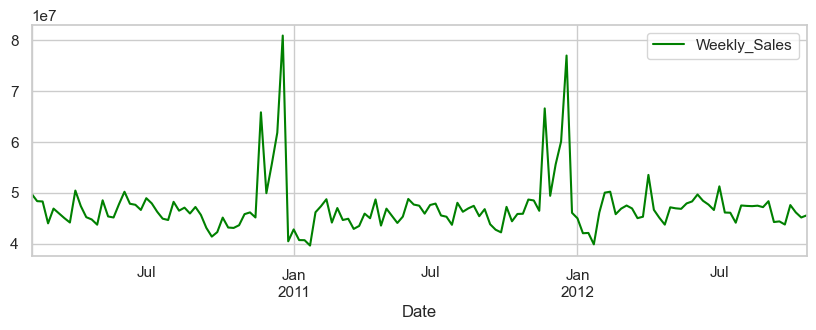

In [17]:
sales1 = df.groupby('Date')[['Weekly_Sales']].sum()
sales1.plot(color='green', figsize=(10,3))
plt.show()

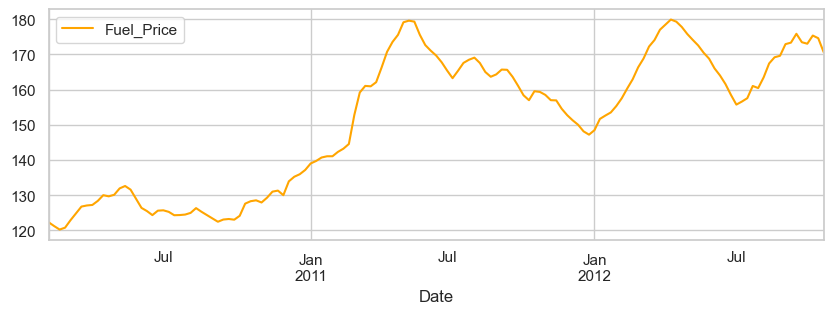

In [18]:
sales2 = df.groupby('Date')[['Fuel_Price']].sum()
sales2.plot(color='orange', figsize=(10,3))
plt.show()

It has trend

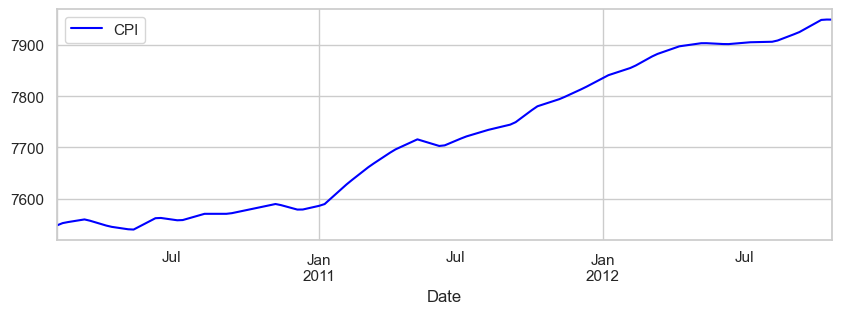

In [19]:
sales3 = df.groupby('Date')[['CPI']].sum()
sales3.plot(color='blue', figsize=(10,3))
plt.show()

It also has trend

In [20]:
# Transform date to day, month, year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,Friday,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,Friday,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,Friday,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,Friday,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,Friday,2010


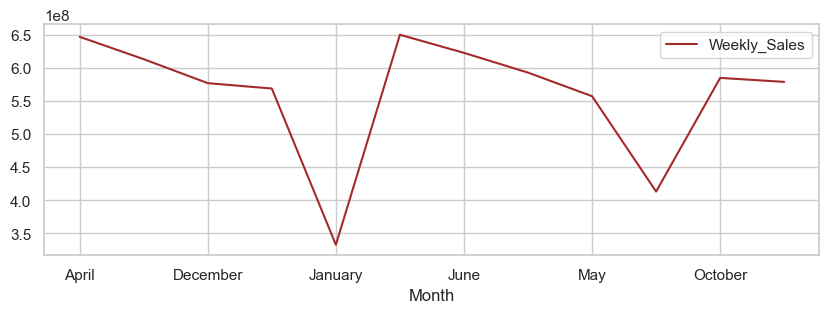

In [21]:
df.groupby('Month')[['Weekly_Sales']].sum().plot(color='brown', figsize=(10,3))
plt.show()

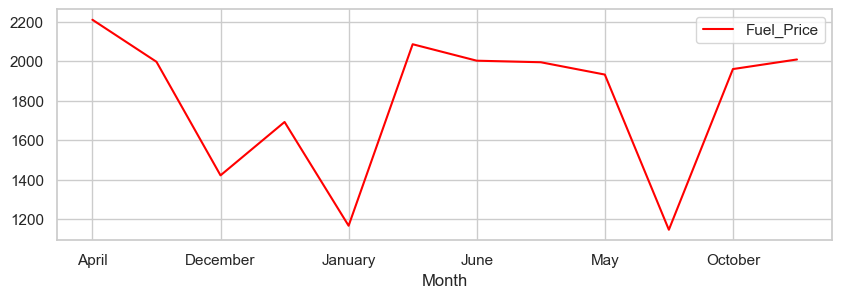

In [22]:
df.groupby('Month')[['Fuel_Price']].sum().plot(color='red', figsize=(10,3))
plt.show()

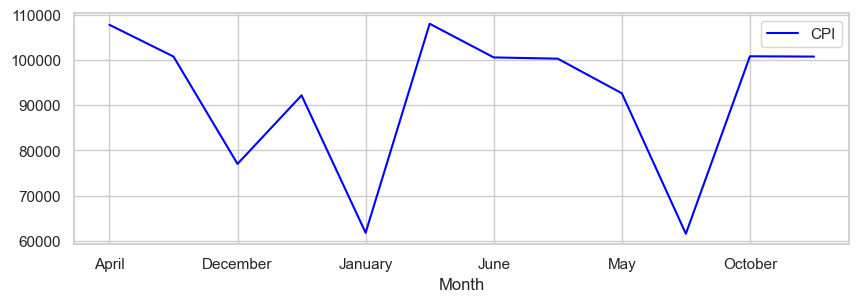

In [23]:
df.groupby('Month')[['CPI']].sum().plot(color='blue', figsize=(10,3))
plt.show()

 Note: January have the lower number of all index

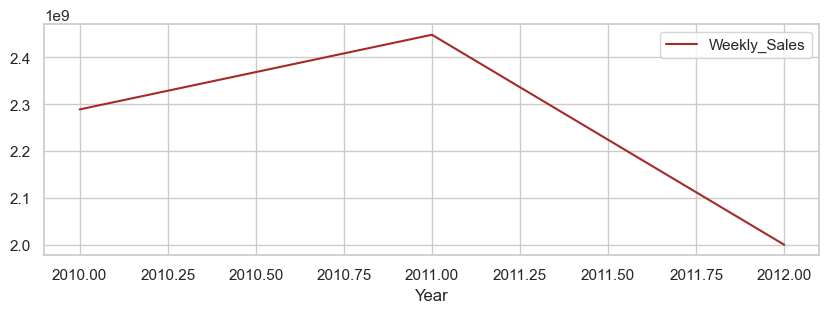

In [24]:
df.groupby('Year')[['Weekly_Sales']].sum().plot(color='brown', figsize=(10,3))
plt.show()

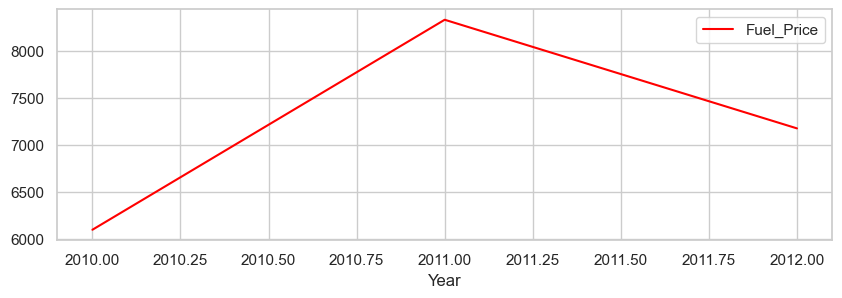

In [25]:
df.groupby('Year')[['Fuel_Price']].sum().plot(color='red', figsize=(10,3))
plt.show()

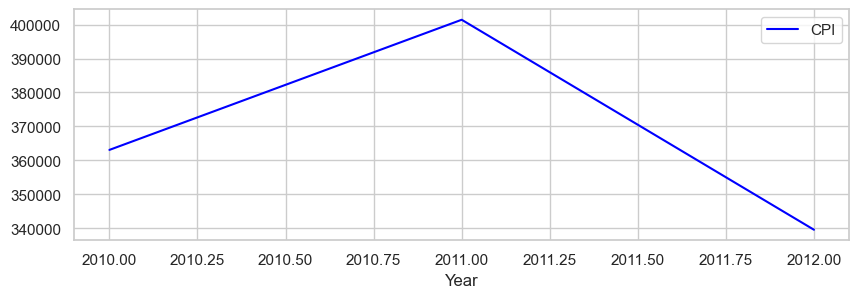

In [26]:
df.groupby('Year')[['CPI']].sum().plot(color='blue', figsize=(10,3))
plt.show()

Note: Until 2011 is increasing, After 2011 it is decreasing

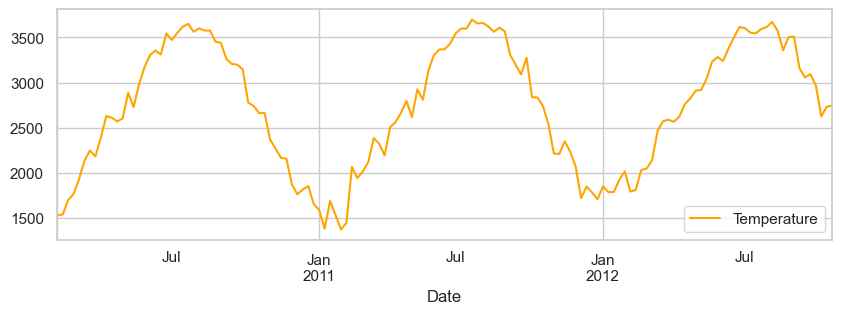

In [27]:
df.groupby('Date')[['Temperature']].sum().plot(color='orange', figsize=(10,3))
plt.show()

Temperature is seasonality pattern

## Unemployment with Date

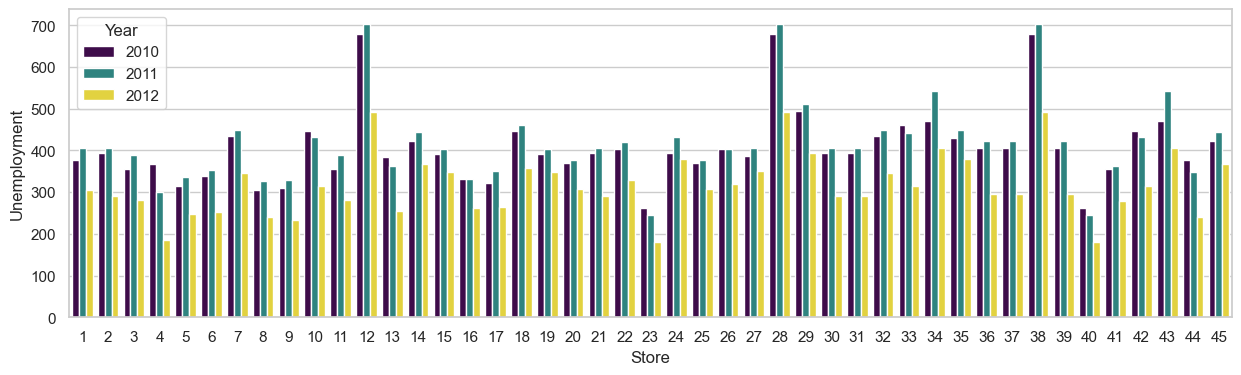

In [28]:
df2 = df.groupby(['Store','Year'])[['Unemployment']].sum().reset_index()

plt.figure(figsize=(15,4))

sns.barplot(df2,x='Store', y='Unemployment', hue='Year',palette='viridis')
plt.show()

2012 has the least unemployment, 2011 has the highest number of unemployment

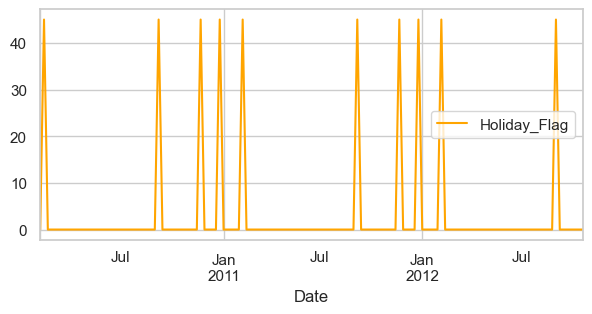

In [29]:
sales=df.groupby("Date")[["Holiday_Flag"]].sum()
sales.plot(color='orange',figsize=(7,3))

plt.show()

In [30]:
df_year = df.groupby('Year')['Month'].value_counts().fillna(0)
df_year

Year  Month    
2010  April        225
      October      225
      December     225
      July         225
      November     180
      September    180
      February     180
      June         180
      August       180
      March        180
      May          180
2011  September    225
      December     225
      April        225
      July         225
      October      180
      November     180
      May          180
      March        180
      June         180
      January      180
      February     180
      August       180
2012  March        225
      June         225
      August       225
      October      180
      May          180
      July         180
      January      180
      February     180
      April        180
      September    180
Name: count, dtype: int64

In [31]:
# unstack 用於將 DataFrame 或 Series 中的索引級別轉換為列
df_year = df.groupby('Year')['Month'].value_counts().unstack().fillna(0).T
df_year

Year,2010,2011,2012
Month,,,
April,225.0,225.0,180.0
August,180.0,180.0,225.0
December,225.0,225.0,0.0
February,180.0,180.0,180.0
January,0.0,180.0,180.0
July,225.0,225.0,180.0
June,180.0,180.0,225.0
March,180.0,180.0,225.0
May,180.0,180.0,180.0


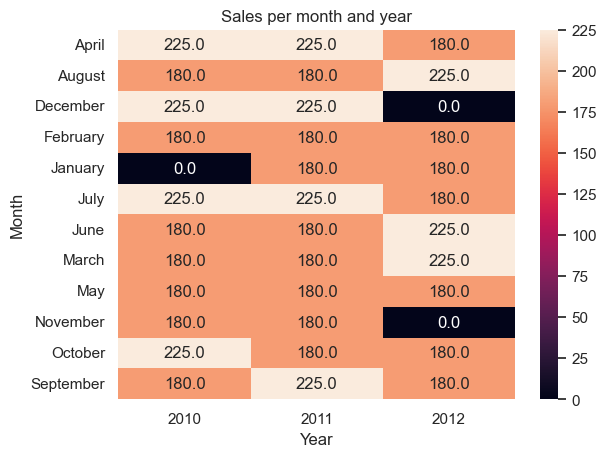

In [32]:
sns.heatmap(df_year, annot=True, cmap='rocket', fmt='.1f')
plt.title('Sales per month and year')

plt.show()

Jan/2010, Nov/2012, Dec/2012 have no sales, because it's holiday

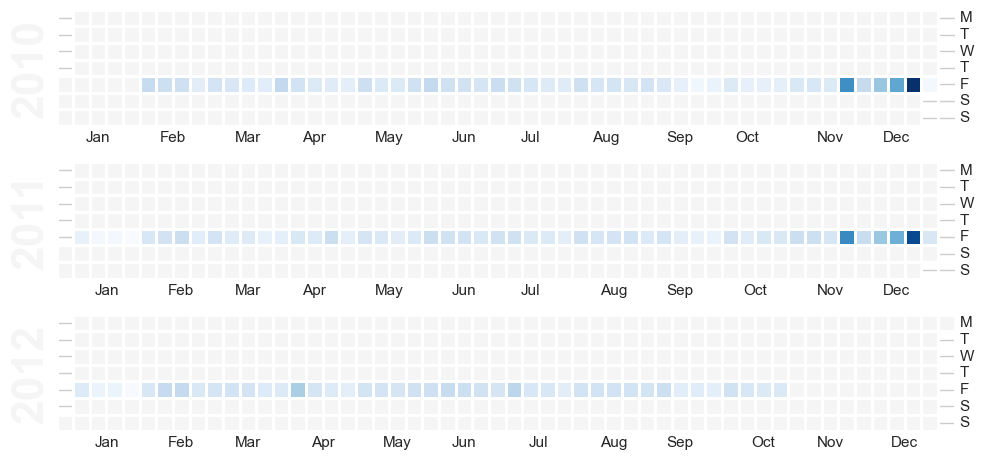

In [33]:
# daylabels = Monday, Tuesday, Wednesday ....Sunday
sales = df.groupby('Date')['Weekly_Sales'].sum()

calmap.calendarplot(sales, daylabels='MTWTFSS', cmap='Blues', fig_kws=dict(figsize=(10, 5)))

plt.show()

It seems Nov and Dec have the higher sales

## Build Model

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [34]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [35]:
# define function to plot acf, pacf
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(12,5))
    
    # one row two columns the first picture
    ax1 = fig.add_subplot(121)
    
    fig = plot_acf(data, lags=20, ax=ax1)
    
    fig = plt.figure(figsize=(12,5))
    
    ax2 = fig.add_subplot(122)
    
    fig = plot_pacf(data, lags=20, ax=ax2)

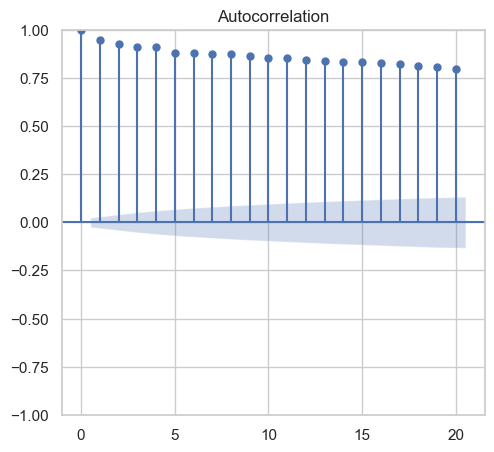

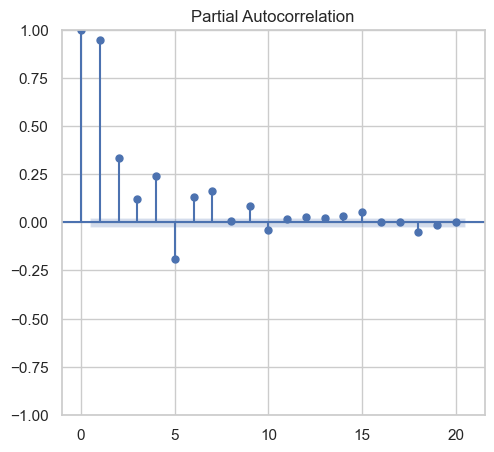

In [36]:
ACF_and_PACF(df['Weekly_Sales'])

In [37]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,Friday,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,Friday,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,Friday,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,Friday,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,Friday,2010


In [38]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [39]:
sales = df.groupby('Date')[['Weekly_Sales']].sum()
weekly_date = (sales.resample('W').mean())
weekly_date

,Weekly_Sales
Date,
2010-02-07,49750740.50
2010-02-14,48336677.63
2010-02-21,48276993.78
2010-02-28,43968571.13
2010-03-07,46871470.30
...,...
2012-09-30,43734899.40
2012-10-07,47566639.31
2012-10-14,46128514.25


<Axes: xlabel='Date'>

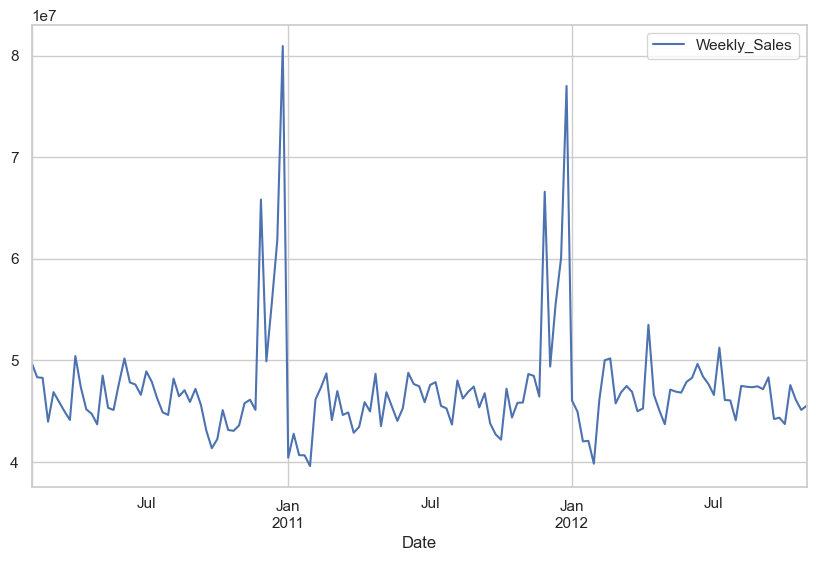

In [40]:
weekly_date.plot()

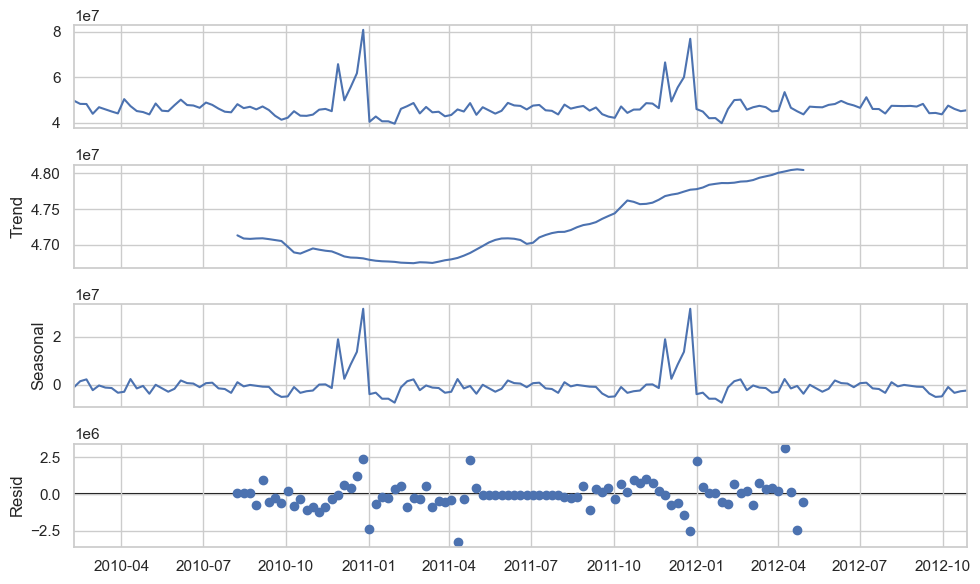

In [41]:
decomposition = seasonal_decompose(weekly_date, model='add')

decomposition.plot();

In [42]:
# Check if it's stationary
rolmean = weekly_date.rolling(window=4).mean()  # 1 month
rolstd = weekly_date.rolling(window=4).std()
print(rolmean, rolstd)

            Weekly_Sales
Date                    
2010-02-07           NaN
2010-02-14           NaN
2010-02-21           NaN
2010-02-28  4.758325e+07
2010-03-07  4.686343e+07
...                  ...
2012-09-30  4.516139e+07
2012-10-07  4.497053e+07
2012-10-14  4.544615e+07
2012-10-21  4.563812e+07
2012-10-28  4.609042e+07

[143 rows x 1 columns]             Weekly_Sales
Date                    
2010-02-07           NaN
2010-02-14           NaN
2010-02-21           NaN
2010-02-28  2.504187e+06
2010-03-07  2.045230e+06
...                  ...
2012-09-30  2.129258e+06
2012-10-07  1.751216e+06
2012-10-14  1.739930e+06
2012-10-21  1.617393e+06
2012-10-28  1.067109e+06

[143 rows x 1 columns]


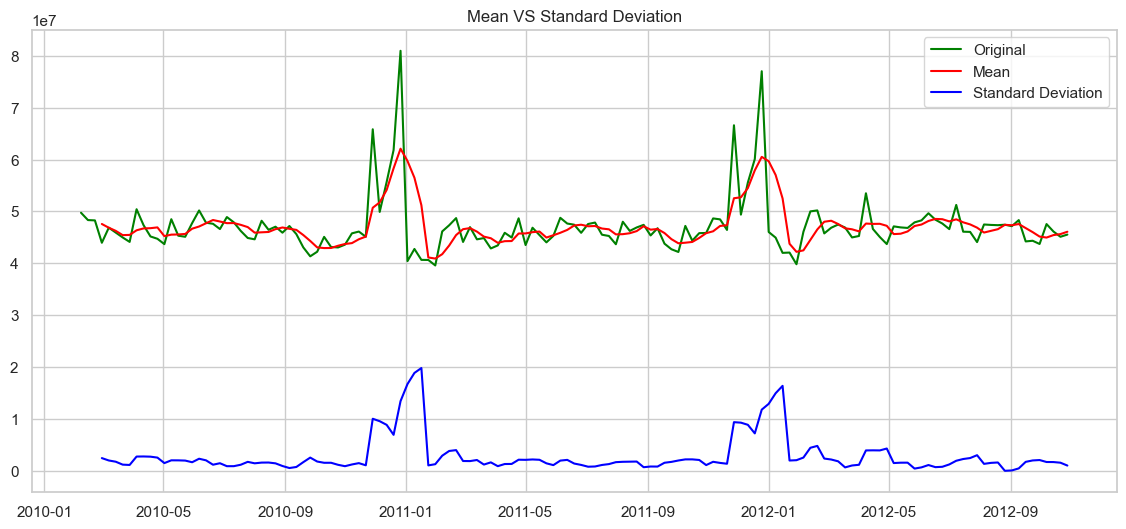

In [43]:
plt.figure(figsize=(14,6))

og = plt.plot(weekly_date, color='green', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Standard Deviation')

plt.legend(loc='best')
plt.title('Mean VS Standard Deviation')
plt.show()

In [44]:
weekly_date.shape

(143, 1)

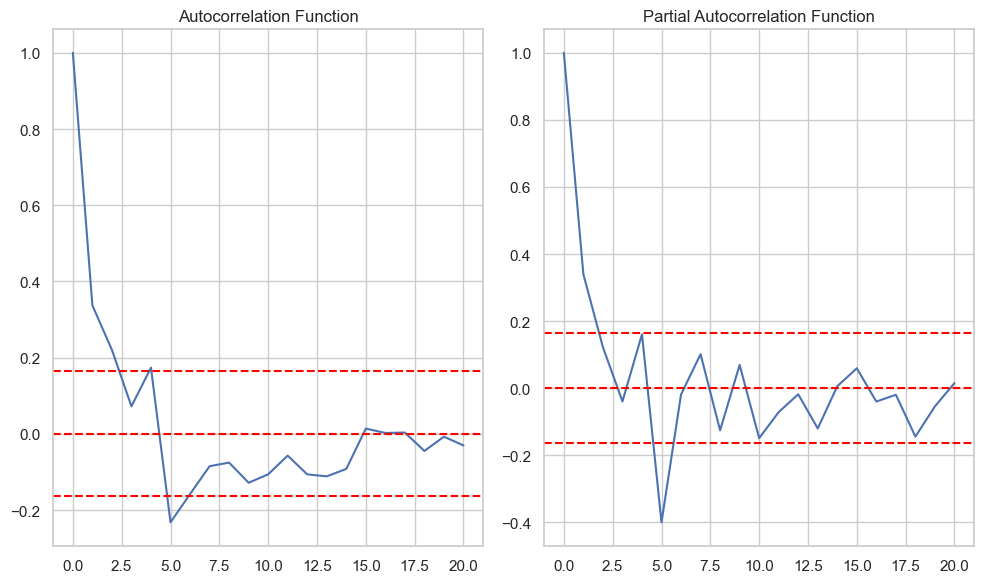

In [45]:
lag_acf = acf(weekly_date, nlags=20)
lag_pacf = pacf(weekly_date, nlags=20)

# ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(weekly_date)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(weekly_date)), linestyle='--', color='red')
plt.title('Autocorrelation Function')            

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(weekly_date)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(weekly_date)), linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

 ACF 和 PACF 圖用於展示時間序列數據在不同延遲下的自相關和偏自相關程度。
 
 在這兩圖中，中心的紅色虛線 (y=0) 表示無自相關的基準線。
 
 而 y=±1.96/np.sqrt(len(y)) 則用於繪制95%置信區間的上下邊界。
 
 這里，±1.96 是來源於正態分布臨界值，對應於雙尾檢驗中95%置信水平下的Z分數。
 
 np.sqrt(len(y)) 計算的是樣本大小的平方根，這是標準誤差計算的一部分。
 
 標準誤差用於量化平均值的可靠性，計算公式通常是標準差除以樣本大小的平方根。
 
 使用這個標準誤差來調整95%置信區間的寬度，反映出樣本大小對自相關和偏自相關估計可靠性的影響。
 
 當ACF或PACF的某個延遲值超出這個置信區間時，可以認為該延遲在統計上顯著，意味著非零的自相關或偏自相關存在於該延遲級別。
 
 這對於識別時間序列模型中潛在的AR(p)和MA(q)參數非常重要。
 
ACF 圖中，延遲 5 時，自相關性首次跌入不顯著區域（即接近 y=0）， q 值可能是 5。

PACF 圖中，延遲 3 時，偏自相關性首次跌入不顯著區域（即接近 y=0）， p 值可能是 3。

ACF（自相關函數）或PACF（偏自相關函數）的某個延遲值超出了95%置信區間的上下邊界時，這意味著在該特定的時間延遲上，數據顯示出了一種不太可能是偶然發生的規律或模式。換句話說，這種相關性太強了，以至於可以肯定它不是隨機出現的。

具體來說：

對於ACF圖：如果超出了邊界，這說明在那個特定的延遲期間（比如說，兩個月前的銷售額和現在的銷售額之間）存在一種顯著的相關性。這可能是因為市場行為的某種內在規律，比如人們習慣於每兩個月就重覆某種購買行為。

對於PACF圖：超出邊界的意義則是，在考慮了其他所有時間延遲的影響後，那個特定延遲期的數據之間還存在一種強相關。這可以幫助識別數據背後可能的因果關系，例如，可能正是因為前一個月的促銷活動，導致了本月銷售額的增加。

ACF圖中的顯著延遲值可以幫助確定AR部分的階數(p)，而ACF圖中的顯著延遲值有助於確定MA部分的階數(q)。

In [46]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

p（AR 部分）：PACF 圖顯示在延遲 1 後有截尾，因此 AR 部分的 p 值可以從1開始。

d（差分階數）：無法僅憑 ACF 和 PACF 圖來確定，通常需要更深入的分析。不過，如果時間序列經過檢驗是平穩的，可以假定 d 為 0 或 1。如果時間序列是非平穩的，並且存在趨勢性，那麽可能需要 d ≥ 1 來進行差分使序列平穩。

q（MA 部分）：盡管 ACF 圖顯示出長期的正相關性，但它並沒有像典型的 MA 過程那樣在某一點上截尾。然而，通常 q 會小於或等於 p 的值，因此可以考慮從 q = 0 開始測試，並根據模型的信息準則（如 AIC、BIC）進行調整。

In [47]:
# aic_values = {}
# rmse_values = {}

# for m in range(1, 27):
 #   seasonal_model = auto_arima(train, start_p=1, start_q=1,
                     #           max_p=5, max_q=3, m=m,
                     #           seasonal=True, d=1, D=1,
                     #           trace=False, error_action='ignore',
                     #           suppress_warnings=True, stepwise=True)
    
    # find aic
  #  aic_values[m] = seasonal_model.aic()
    
    # calculate RMSE
  #  predictions = seasonal_model.predict(n_periods=len(test))
  #  rmse_values[m] = mean_squared_error(test, predictions, squared=False)
    
# 對 AIC 值進行排序，獲取前五個最佳 m 值
# sorted_aic = sorted(aic_values.items(), key=lambda item: item[1])
# best_aic_m_values = sorted_aic[:5]

# 對 RMSE 值進行排序，獲取前五個最佳 m 值
# sorted_rmse = sorted(rmse_values.items(), key=lambda item: item[1])
# best_rmse_m_values = sorted_rmse[:5]

# 前五個最佳的 m 值和它們的 AIC
# print("Best 5 m values by AIC:")
# for m, aic in best_aic_m_values:
#    print(f'm={m}: AIC={aic}')

# 前五個最佳的 m 值和它們的 RMSE
# print("\nBest 5 m values by RMSE:")
# for m, rmse in best_rmse_m_values:
#    print(f'm={m}: RMSE={rmse}')
    
# Best 5 m values by AIC:
# m=26: AIC=2299.195202794253
# m=25: AIC=2355.2969891885873
# m=24: AIC=2375.712445828442
# m=23: AIC=2403.3786063179164
# m=22: AIC=2436.9938260609006

# Best 5 m values by RMSE:
# m=1: RMSE=50632.36879409261
# m=3: RMSE=56768.08744257508
# m=5: RMSE=63782.25780309888
# m=7: RMSE=67874.26082530666
# m=8: RMSE=71952.49479860702

In [48]:
y_train = weekly_date.loc['2010-02-05':'2012-02-07']
y_test = weekly_date.loc['2012-02-07':]

In [49]:
model = auto_arima(weekly_date, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=5, # maximum p and q
                      m=15,              # frequency of series
                      d=1,              # let model determine 'd'
                      seasonal=True,    # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
print('AIC Value', model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[15]             : AIC=4364.119, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[15]             : AIC=4426.674, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[15]             : AIC=4391.218, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[15]             : AIC=4362.383, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[15]             : AIC=4402.282, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[15]             : AIC=4363.465, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[15]             : AIC=4362.917, Time=0.27 sec
 ARIMA(0,1,1)(1,1,0)[15]             : AIC=4386.254, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[15]             : AIC=4363.270, Time=0.54 sec
 ARIMA(0,1,0)(0,1,1)[15]             : AIC=4375.695, Time=0.07 sec
 ARIMA(0,1,2)(0,1,1)[15]             : AIC=4371.877, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[15]             : AIC=4365.293, Time=0.10 sec
 ARIMA(1,1,2)(0,1,1)[15]             : AIC=4363.439, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[15] intercept   : AIC=4363.686, Time=0.12 sec

Best model:  ARIMA

In [50]:
model_sarimax = SARIMAX(y_train, order=(0,1,1), seasonal_order=(0,1,1,15))

result = model_sarimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46693D+01    |proj g|=  1.21181D-01

At iterate    5    f=  1.46491D+01    |proj g|=  1.84880D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   4.707D-08   1.465D+01
  F =   14.649148303954203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [51]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 15)   Log Likelihood               -1538.161
Date:                            Thu, 04 Apr 2024   AIC                           3082.321
Time:                                    10:45:27   BIC                           3089.787
Sample:                                02-07-2010   HQIC                          3085.330
                                     - 02-05-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3979      0.077     -5.162      0.000      -0.549      -0.247
ma.S.L15      -0.6617      0.155     -4.272      0.000      -0.965      -0.358
sigma2      7.197e+13   5.04e-16   1.43e+29      0.000     7.2e+13     7.2e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                83.72
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.92   Skew:                            -0.36
Prob(H) (two-sided):                  0.08   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [52]:
forecast_obj = result.get_forecast(steps=len(y_test))

# 選取預測平均值
prediction = forecast_obj.predicted_mean

# 如果預測值為 Series，直接用作 forecast_series
# 如果預測值為 ndarray，轉換成 Series 設置index與 y_test匹配
if not isinstance(prediction, pd.Series):
    forecast_series = pd.Series(prediction, index=y_test.index)
else:
    forecast_series = prediction

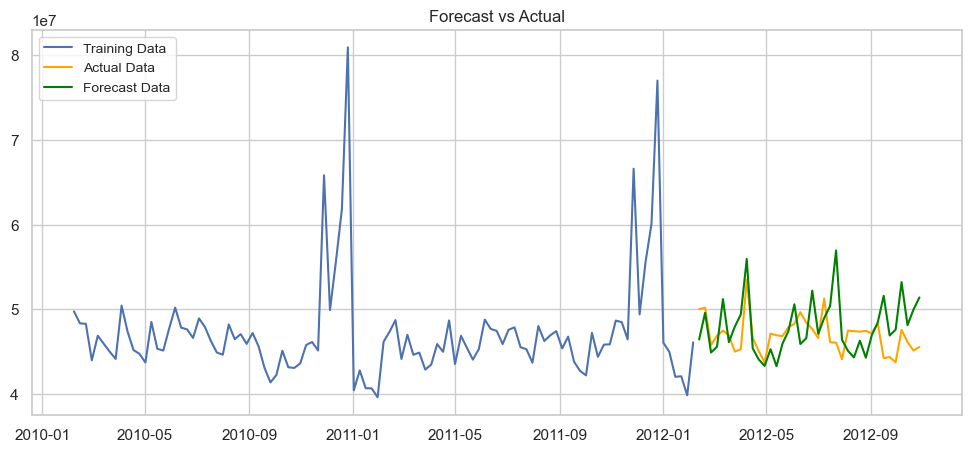

In [53]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='Training Data')
plt.plot(y_test, label='Actual Data', color='orange')
plt.plot(forecast_series, label='Forecast Data', color='green')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
mae_error = np.round(mean_absolute_percentage_error(y_test,forecast_series)*100,2)

print(f'{mae_error}%')

5.91%
